# Building a linear regression model to predict housing prices based on a given dataset. 

In [122]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score

## Step 1: Load and explore the dataset, including visualizing the features and target variable.

In [106]:
df = pd.read_csv("train.csv")

In [23]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [24]:
# Get information about the data types and missing values in the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
None


In [25]:
# Get statistical data like count, mean, min, max and more about the dataset

print(df.describe())

               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   18.448048   
std      0.703952   28.1333

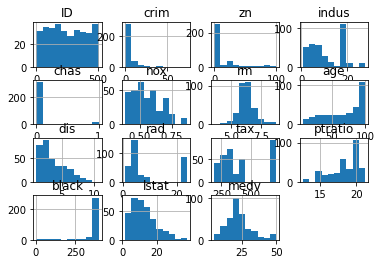

In [97]:
df.hist()
plt.show()

### medv is our target variable

In [26]:
# medv --> is the median value of owner-occupied homes in \$1000s.

# rm ----> represents the average number of rooms in each home in a given neighborhood.

#There may be some relationship between rm and medv, 

# neighborhoods with larger and more spacious homes (higher rm values) are more expensive (higher medv values)

# SO, we should see a direct relation between rm and medv

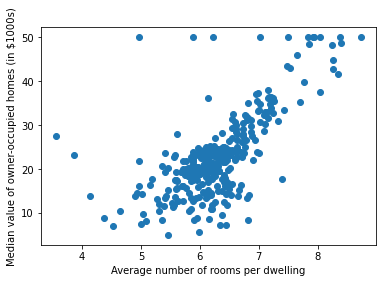

In [29]:
# Create a scatterplot of the 'rm' and 'medv' variables

plt.scatter(df['rm'], df['medv'])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes (in $1000s)')

plt.show()


# Creating a scatterplot with the rm variable on the x-axis and the medv variable on the y-axis
# to see if there is a positive correlation between the number of rooms and the house price.

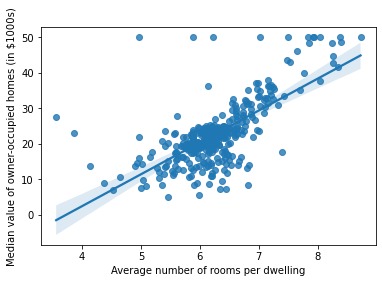

In [30]:
#Creating a scatter plot of rm vs medv using the regplot function from Seaborn. 

sns.regplot(x='rm', y='medv', data=df)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes (in $1000s)')

plt.show()

### Example 2:

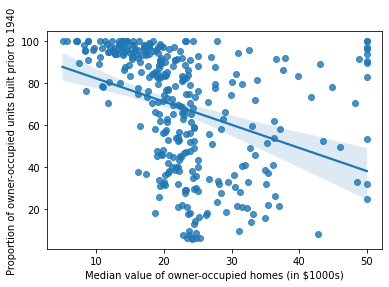

In [35]:
# Create a scatter plot of 'age' vs 'medv' with a linear regression line
sns.regplot(x='medv', y='age', data=df)
plt.xlabel('Median value of owner-occupied homes (in $1000s)')
plt.ylabel('Proportion of owner-occupied units built prior to 1940')
plt.show()


# this scatter plot shows that the more age a house has the lower the price in most cases and vice versa.

### Example 3:

In [ ]:
sns.regplot(x='crim', y='medv', data=df)
plt.xlabel('Crime')
plt.ylabel('medv')

plt.show()


## Step 2: Split the dataset into training and testing sets.

In [31]:
# To avoid overfitiing we usually split the dataset into training and testing sets

# We use the training set totrain the model
# we use the testing set is used to evaluate the model's performance on some random data.



In [48]:
X = df[['age']]
y = df['medv']

In [46]:
from sklearn.model_selection import train_test_split

### Setting size of training dataset = 80% and the size of testing dataset = 20%

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Confirming that we got the right proportion

In [71]:
# Testing for both X and Y

print( "Size of X = " + str(len(X)) )

print( "\nSize of X Training Dataset = " + str(len(X_train)))

print( "\nSize of X Testing Dataset = "  + str(len(X_test)))

print("\n20% of Total Dataset X = 67, and 80% of dataset is used for Training")  

Size of X = 333

Size of X Training Dataset = 266

Size of X Testing Dataset = 67

20% of Total Dataset X = 67, and 80% of dataset is used for Training


## Step 3: Preprocess the data by handling missing values and performing feature scaling.

In [109]:
# Checking for missing values:

check_null = df.isnull().sum()
print(check_null)

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [81]:
# PERFORMING FEATURE SCALING 

In [111]:
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [113]:
# SimpleImputer class from sklearn.imput library is used here to fill the missing values with the mean of the feature values.

#imputer = SimpleImputer(strategy='mean')

#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.89403734],
       [ 0.49269107],
       [ 0.60116304],
       [-0.09667326],
       [-0.21237668],
       [-0.91021298],
       [-0.06051594],
       [ 0.98804637],
       [ 0.55054279],
       [-1.02953214],
       [-0.84151407],
       [ 0.36252472],
       [ 1.02420369],
       [-0.35339024],
       [-1.09823105],
       [ 0.95912051],
       [-1.85753479],
       [-0.44739927],
       [ 0.8108755 ],
       [ 1.01697223],
       [ 0.19981677],
       [ 0.82172269],
       [-1.28986485],
       [ 1.05674528],
       [ 1.10013406],
       [ 0.82895416],
       [-0.15090924],
       [ 0.53607986],
       [-1.8249932 ],
       [-0.38954756],
       [ 1.12544419],
       [ 0.52161693],
       [ 1.04951382],
       [-0.5522555 ],
       [ 1.12544419],
       [ 0.28297861],
       [ 1.02058796],
       [ 1.12544419],
       [ 1.03143515],
       [ 0.80725976],
       [ 1.01335649],
       [ 0.83256989],
       [ 0.63008889],
       [-2.02024273],
       [ 1.12544419],
       [-0

## Step 4: Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# Creating a instance of class LinearRegression() that we got from sklearn.linear_model --> LinearRegression

my_model = LinearRegression()

In [125]:
# Train the model based on our previously split dataset

my_model.fit(X_train, y_train)

LinearRegression()

In [126]:
# Make predictions on the training data

ypred = my_model.predict(X_train)

In [127]:
ypred

array([19.64612586, 20.98566378, 20.6236265 , 22.95273297, 23.33890606,
       25.66801253, 22.83205388, 19.33236022, 20.79257723, 26.06625353,
       25.43872226, 21.42010851, 19.21168113, 23.80955452, 26.2955438 ,
       19.4289035 , 28.82980473, 24.12332016, 19.92368777, 19.23581695,
       21.96316442, 19.88748404, 26.93514299, 19.10306995, 18.95825504,
       19.86334823, 23.13375161, 20.84084887, 28.72119354, 23.93023361,
       18.87377968, 20.8891205 , 19.12720577, 24.47328952, 18.87377968,
       21.68560251, 19.22374904, 18.87377968, 19.18754531, 19.93575568,
       19.24788486, 19.85128032, 20.52708323, 29.37286064, 18.87377968,
       24.5698328 , 18.87377968, 21.95109651, 29.74696582, 19.60992213,
       22.54242406, 26.50069826, 23.36304188, 28.793601  , 19.09100204,
       28.35915627, 19.06686622, 25.12495662, 20.14091014, 19.87541614,
       20.50294741, 20.03229895, 25.30597525, 27.04375417, 24.08711643,
       24.63017234, 21.56492342, 23.76128288, 27.35751981, 19.01

## Step 5: Evaluate the model's performance on the testing data using metrics such as mean squared error (MSE) or R-squared.

In [131]:
prediction_score = r2_score(Y_test, ypred)
print(r2)

0.7274964738709092
